## Designing a classification model in Pycaret

In [90]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np
import Confusionfunc as cf
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt



The above line of code is used to call the various libraries which will be utilized throughout this notebook.Each of the libraries listed above are very crutial to the proper implementation or running of the models designed in the workbook.If any of the listed libraries above was missing the codes below wouldn't run hence the notebook would then be rendered useless until the correct library is called

In [91]:
import pymssql
conn = pymssql.connect('ML-RefVm-981587\MSSQLSERVER2', 'symptom', 'root_2022', 'Symptomdatabase')  
cursor = conn.cursor(as_dict=True)

The code above seeks to call / gather information from SSMS as I did my data clensing via that methodology.The code follows 
the following sequence (Server name/instance"ML-RefVm-981587\MSSQLSERVER2",username"symptom",password "'root_2022",database name "Symptomdatabase")

In [92]:
lst = []
cursor.execute('SELECT * FROM stg.finaldataset;')
for row in cursor:
    lst.append(row)
    
df = pd.DataFrame(lst)

This code returns all the values from the cleansed dataset/table "finaldataset" and returns it into a dataframe called "df"

In [93]:
df.drop(df.columns[[3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35]],axis=1, inplace=True)

Columns displaying the weigh assigned to each symptom were dropped so as to allow for better shape or reading of the data 
as well as the weights weren't a crucial factor in the design of the classification 

In [94]:
df.head()

,Disease_id,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17,Send_to_Doctor
0,D003,AIDS,muscle_wasting,patches_in_throat,high_fever,extra_marital_contacts,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,D003,AIDS,muscle_wasting,patches_in_throat,high_fever,extra_marital_contacts,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,D003,AIDS,muscle_wasting,patches_in_throat,high_fever,extra_marital_contacts,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,D003,AIDS,muscle_wasting,patches_in_throat,high_fever,extra_marital_contacts,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,D003,AIDS,muscle_wasting,patches_in_throat,high_fever,extra_marital_contacts,0,0,0,0,0,0,0,0,0,0,0,0,0,1


Code was used so as to check to ensure that the weight columns were truly dropped

In [95]:
len(df)

4920

Code was used to ensure that there wasn't any data missing from the dataset

In [96]:
from pycaret.classification import *
s = setup(df, target = 'Disease', session_id = 42)

,Description,Value
0,Session id,42
1,Target,Disease
2,Target type,Multiclass
3,Target mapping,"(vertigo) Paroymsal Positional Vertigo: 0, AIDS: 1, Acne: 2, Alcoholic hepatitis: 3, Allergy: 4, Arthritis: 5, Bronchial Asthma: 6, Cervical spondylosis: 7, Chicken pox: 8, Chronic cholestasis: 9, Common Cold: 10, Dengue: 11, Diabetes : 12, Dimorphic hemorrhoids(piles): 13, Drug Reaction: 14, Fungal infection: 15, GERD: 16, Gastroenteritis: 17, Heart attack: 18, Hepatitis B: 19, Hepatitis C: 20, Hepatitis D: 21, Hepatitis E: 22, Hypertension : 23, Hyperthyroidism: 24, Hypoglycemia: 25, Hypothyroidism: 26, Impetigo: 27, Jaundice: 28, Malaria: 29, Migraine: 30, Osteoarthristis: 31, Paralysis (brain hemorrhage): 32, Peptic ulcer diseae: 33, Pneumonia: 34, Psoriasis: 35, Tuberculosis: 36, Typhoid: 37, Urinary tract infection: 38, Varicose veins: 39, hepatitis A: 40"
4,Original data shape,"(4920, 20)"
5,Transformed data shape,"(4920, 131)"
6,Transformed train set shape,"(3444, 131)"
7,Transformed test set shape,"(1476, 131)"
8,Ordinal features,2
9,Categorical features,19


The code above is used to kick start the classification by transforming the data (i.e) ensuring that the data is cleaned.
This entails ensuring that there are no null values among other things in the dataset. Also important to note is that through 
the code above users can state which field they want to predict in my case I am predicting the disease field.In addition to this users can also select a session i.d which basically controlls the randomness of the prediction

In [97]:
best=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,2.0600
qda,Quadratic Discriminant Analysis,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.5100
et,Extra Trees Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.7830
rf,Random Forest Classifier,0.9977,1.0000,0.9977,0.9965,0.9969,0.9976,0.9977,1.5210
lr,Logistic Regression,0.9939,0.9999,0.9939,0.9950,0.9939,0.9938,0.9938,4.5940
knn,K Neighbors Classifier,0.9939,1.0000,0.9939,0.9950,0.9938,0.9938,0.9938,1.4980
catboost,CatBoost Classifier,0.9855,1.0000,0.9855,0.9847,0.9822,0.9851,0.9854,2.7550
dt,Decision Tree Classifier,0.9097,0.9537,0.9097,0.8733,0.8830,0.9074,0.9099,1.6500
lightgbm,Light Gradient Boosting Machine,0.8786,0.9936,0.8786,0.8669,0.8576,0.8756,0.8794,2.0810
xgboost,Extreme Gradient Boosting,0.8749,0.9954,0.8749,0.8744,0.8572,0.8717,0.8762,1.3900


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

The code above is used to analyse the dataset to select which model will be best to run the prediction in my case the best 
model would be Naive Bayes. Important to remember every model is bad but some are useful. :)

In [98]:
best

GaussianNB(priors=None, var_smoothing=1e-09)

The code above displays the best model for my dataset

In [99]:
nb = create_model('nb')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

This code is used to create the best model selected and pass it off to a varialbe called  "nb"

In [100]:
predict_model(nb)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,1.0000,1.0000,0,0,0,1.0000,1.0000


,Disease_id,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,...,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17,Send_to_Doctor,Disease,prediction_label,prediction_score
3306,D0026,fatigue,mood_swings,weight_loss,restlessness,sweating,diarrhoea,fast_heart_rate,excessive_hunger,muscle_weakness,...,0,0,0,0,0,0,1,Hyperthyroidism,Hyperthyroidism,1.0
3000,D0011,continuous_sneezing,chills,fatigue,cough,high_fever,headache,swelled_lymph_nodes,malaise,phlegm,...,sinus_pressure,runny_nose,congestion,chest_pain,loss_of_smell,muscle_pain,1,Common Cold,Common Cold,1.0
1806,D0023,joint_pain,vomiting,fatigue,dark_urine,nausea,loss_of_appetite,abdominal_pain,yellowing_of_eyes,0,...,0,0,0,0,0,0,1,Hepatitis D,Hepatitis D,1.0
2664,D0038,chills,vomiting,fatigue,weight_loss,cough,high_fever,breathlessness,sweating,loss_of_appetite,...,swelled_lymph_nodes,malaise,phlegm,chest_pain,blood_in_sputum,0,1,Tuberculosis,Tuberculosis,1.0
4446,D0029,skin_rash,high_fever,blister,red_sore_around_nose,yellow_crust_ooze,0,0,0,0,...,0,0,0,0,0,0,1,Impetigo,Impetigo,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4744,D004,vomiting,yellowish_skin,abdominal_pain,swelling_of_stomach,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload,0,0,...,0,0,0,0,0,0,1,Alcoholic hepatitis,Alcoholic hepatitis,1.0
1867,D0041,fatigue,cramps,bruising,obesity,swollen_legs,swollen_blood_vessels,prominent_veins_on_calf,0,0,...,0,0,0,0,0,0,1,Varicose veins,Varicose veins,1.0
3907,D0036,chills,fatigue,cough,high_fever,breathlessness,sweating,malaise,phlegm,chest_pain,...,0,0,0,0,0,0,1,Pneumonia,Pneumonia,1.0
3551,D0033,joint_pain,neck_pain,knee_pain,hip_joint_pain,swelling_joints,painful_walking,0,0,0,...,0,0,0,0,0,0,1,Osteoarthristis,Osteoarthristis,1.0


This code is where the magic happends / This is where the data/target actually gets predicted as can be seen above in my case 
the two most important columns to look out for are "Disease" and "Prediction_label"

In [101]:
tuned_nb=tune_model(nb)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


Here the model is tuned or tested by 10 folds or 10 times to see how accurate the model is 

In [102]:
df_nb=predict_model(tuned_nb)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,1.0000,1.0000,0,0,0,1.0000,1.0000


The code above is used to predict the accuracy,recall, area under the curve and so on  based on the tuned model 

In [103]:
df_nb.head()

,Disease_id,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,...,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17,Send_to_Doctor,Disease,prediction_label,prediction_score
3306,D0026,fatigue,mood_swings,weight_loss,restlessness,sweating,diarrhoea,fast_heart_rate,excessive_hunger,muscle_weakness,...,0,0,0,0,0,0,1,Hyperthyroidism,Hyperthyroidism,1.0
3000,D0011,continuous_sneezing,chills,fatigue,cough,high_fever,headache,swelled_lymph_nodes,malaise,phlegm,...,sinus_pressure,runny_nose,congestion,chest_pain,loss_of_smell,muscle_pain,1,Common Cold,Common Cold,1.0
1806,D0023,joint_pain,vomiting,fatigue,dark_urine,nausea,loss_of_appetite,abdominal_pain,yellowing_of_eyes,0,...,0,0,0,0,0,0,1,Hepatitis D,Hepatitis D,1.0
2664,D0038,chills,vomiting,fatigue,weight_loss,cough,high_fever,breathlessness,sweating,loss_of_appetite,...,swelled_lymph_nodes,malaise,phlegm,chest_pain,blood_in_sputum,0,1,Tuberculosis,Tuberculosis,1.0
4446,D0029,skin_rash,high_fever,blister,red_sore_around_nose,yellow_crust_ooze,0,0,0,0,...,0,0,0,0,0,0,1,Impetigo,Impetigo,1.0


In [104]:
predict_model(nb)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,1.0000,1.0000,0,0,0,1.0000,1.0000


,Disease_id,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,...,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17,Send_to_Doctor,Disease,prediction_label,prediction_score
3306,D0026,fatigue,mood_swings,weight_loss,restlessness,sweating,diarrhoea,fast_heart_rate,excessive_hunger,muscle_weakness,...,0,0,0,0,0,0,1,Hyperthyroidism,Hyperthyroidism,1.0
3000,D0011,continuous_sneezing,chills,fatigue,cough,high_fever,headache,swelled_lymph_nodes,malaise,phlegm,...,sinus_pressure,runny_nose,congestion,chest_pain,loss_of_smell,muscle_pain,1,Common Cold,Common Cold,1.0
1806,D0023,joint_pain,vomiting,fatigue,dark_urine,nausea,loss_of_appetite,abdominal_pain,yellowing_of_eyes,0,...,0,0,0,0,0,0,1,Hepatitis D,Hepatitis D,1.0
2664,D0038,chills,vomiting,fatigue,weight_loss,cough,high_fever,breathlessness,sweating,loss_of_appetite,...,swelled_lymph_nodes,malaise,phlegm,chest_pain,blood_in_sputum,0,1,Tuberculosis,Tuberculosis,1.0
4446,D0029,skin_rash,high_fever,blister,red_sore_around_nose,yellow_crust_ooze,0,0,0,0,...,0,0,0,0,0,0,1,Impetigo,Impetigo,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4744,D004,vomiting,yellowish_skin,abdominal_pain,swelling_of_stomach,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload,0,0,...,0,0,0,0,0,0,1,Alcoholic hepatitis,Alcoholic hepatitis,1.0
1867,D0041,fatigue,cramps,bruising,obesity,swollen_legs,swollen_blood_vessels,prominent_veins_on_calf,0,0,...,0,0,0,0,0,0,1,Varicose veins,Varicose veins,1.0
3907,D0036,chills,fatigue,cough,high_fever,breathlessness,sweating,malaise,phlegm,chest_pain,...,0,0,0,0,0,0,1,Pneumonia,Pneumonia,1.0
3551,D0033,joint_pain,neck_pain,knee_pain,hip_joint_pain,swelling_joints,painful_walking,0,0,0,...,0,0,0,0,0,0,1,Osteoarthristis,Osteoarthristis,1.0


The code above is used to predict the test data with the Naive Bayes model

In [105]:

prediction = predict_model(nb, data=df)
prediction.head()



,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,1.0000,1.0000,0,0,0,1.0000,1.0000


,Disease_id,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,...,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17,Send_to_Doctor,Disease,prediction_label,prediction_score
0,D003,muscle_wasting,patches_in_throat,high_fever,extra_marital_contacts,0,0,0,0,0,...,0,0,0,0,0,0,1,AIDS,AIDS,1.0
1,D003,muscle_wasting,patches_in_throat,high_fever,extra_marital_contacts,0,0,0,0,0,...,0,0,0,0,0,0,1,AIDS,AIDS,1.0
2,D003,muscle_wasting,patches_in_throat,high_fever,extra_marital_contacts,0,0,0,0,0,...,0,0,0,0,0,0,1,AIDS,AIDS,1.0
3,D003,muscle_wasting,patches_in_throat,high_fever,extra_marital_contacts,0,0,0,0,0,...,0,0,0,0,0,0,1,AIDS,AIDS,1.0
4,D003,muscle_wasting,patches_in_throat,high_fever,extra_marital_contacts,0,0,0,0,0,...,0,0,0,0,0,0,1,AIDS,AIDS,1.0


This code is used to test the Naive Bayes predict model against the entire 
dataset

In [106]:
save_model(nb,'nb_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\biauser\AppData\Local\Temp\joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None, include=[],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=Fals...
                                              'Symptom_6', 'Symptom_7'],
                                     transformer=LeaveOneOutEncoder(cols=['Disease_id',
                                                                          'Symptom_1',
                                                 

The code above is used to save the model to a pipeline which will be easy to access
and used to analyse/ predict similar data 

In [107]:
loaded_model = load_model('nb_pipeline')
print(loaded_model)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=FastMemory(location=C:\Users\biauser\AppData\Local\Temp\joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None, include=[],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=Fals...
                                             'Symptom_6', 'Symptom_7'],
                                    transformer=LeaveOneOutEncoder(cols=['Disease_id',
                                                                         'Symptom_1',
        

After saving the pipeline we are loading it back up to the current Jupyter Notebook which we are currently in 

## Recoding user input  to test against the prediction model

In [124]:
var_ng=input ("Please type in Symptom you would like to check ")
 

Please type in Symptom you would like to check itching


In [125]:
var_ng1=input ("Please type in Symptom you would like to check ")

Please type in Symptom you would like to check fatigue


In [126]:
var_rt=input("please enter wheter or not doctor is needed")

please enter wheter or not doctor is needed1


The code above is used to get users to enter information they would like to see returned from the dataset which will in turn be used to test the model created above 

In [127]:
Symptom1=df.loc[df.loc[:,'Symptom_1']==var_ng,:]

In [128]:
Symptom2=Symptom1.loc[Symptom1.loc[:,'Symptom_2']==var_ng1,: ] 

In [129]:
Pred=Symptom2.loc[Symptom2.loc[:,'Send_to_Doctor']==var_rt,: ] 

The code above is used to compare the user input above against the database and return the sub-dataset below which will be used to test the model created 

In [114]:
#type(Pred)
Pred.head()


,Disease_id,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17,Send_to_Doctor
3738,D0021,Hepatitis B,itching,fatigue,yellowish_skin,dark_urine,loss_of_appetite,abdominal_pain,yellow_urine,yellowing_of_eyes,malaise,receiving_blood_transfusion,receiving_unsterile_injections,0,0,0,0,0,0,1
3739,D0021,Hepatitis B,itching,fatigue,yellowish_skin,dark_urine,loss_of_appetite,abdominal_pain,yellow_urine,yellowing_of_eyes,malaise,receiving_blood_transfusion,receiving_unsterile_injections,0,0,0,0,0,0,1
3740,D0021,Hepatitis B,itching,fatigue,yellowish_skin,dark_urine,loss_of_appetite,abdominal_pain,yellow_urine,yellowing_of_eyes,malaise,receiving_blood_transfusion,receiving_unsterile_injections,0,0,0,0,0,0,1
3741,D0021,Hepatitis B,itching,fatigue,yellowish_skin,dark_urine,loss_of_appetite,abdominal_pain,yellow_urine,yellowing_of_eyes,malaise,receiving_blood_transfusion,receiving_unsterile_injections,0,0,0,0,0,0,1
3742,D0021,Hepatitis B,itching,fatigue,yellowish_skin,dark_urine,loss_of_appetite,abdominal_pain,yellow_urine,yellowing_of_eyes,malaise,receiving_blood_transfusion,receiving_unsterile_injections,0,0,0,0,0,0,1


In [115]:
Pred.Disease.unique()

array(['Hepatitis B', 'Chicken pox', 'Jaundice'], dtype=object)

This line of code is used to return the unique value ("Disease")found in the dataset requested by the user whhich are ('Hepatitis B', 'Chicken pox', 'Jaundice')

In [116]:
n_model=load_model('nb_pipeline')

Transformation Pipeline and Model Successfully Loaded


The above code is used to call the model / used to load the model to test against the user input and save it to a variable called n_model.Further to this  the code below is used to show information about the pipeline as may be seen below 

In [117]:
n_model



Pipeline(memory=FastMemory(location=C:\Users\biauser\AppData\Local\Temp\joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None, include=[],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=Fals...
                                             'Symptom_6', 'Symptom_7'],
                                    transformer=LeaveOneOutEncoder(cols=['Disease_id',
                                                                         'Symptom_1',
                                                                         'Symptom_2',
                                                                         'Symptom_3',
                                                                         'Symptom_4',
                                                                         'Symptom_5',
                                                                         'Symptom_6',
                                                                         'Symptom_7'],
                                                                   drop_invariant=False,
                                                                   handle_missing='return_nan',
                                                                   handle_unknown='value',
                                                                   random_state=42,
                                                                   return_df=True,
                                                                   sigma=None,
                                                                   verbose=0))),
                ('trained_model',
                 GaussianNB(priors=None, var_smoothing=1e-09))],
         verbose=False)

In [118]:
npredict=predict_model(n_model,raw_score=False,data=Pred)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,1.0000,0,0,0,0,1.0000,1.0000


The code above is used to implement the predict_model against the user input recorded as "Pred" above and pass it into a variable npredict which is then implemented or ran below to ensure that the model is working properly.This line of code also evaluates the Accuracy,Kappa ,Area Under The Curve and so on for the pred data ran with /evaluated by the prediction  model

In [119]:
#returns the result of the prediction model ran on the Pred dataset
npredict.head()

,Disease_id,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,...,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17,Send_to_Doctor,Disease,prediction_label,prediction_score
3738,D0021,itching,fatigue,yellowish_skin,dark_urine,loss_of_appetite,abdominal_pain,yellow_urine,yellowing_of_eyes,malaise,...,0,0,0,0,0,0,1,Hepatitis B,Hepatitis B,1.0
3739,D0021,itching,fatigue,yellowish_skin,dark_urine,loss_of_appetite,abdominal_pain,yellow_urine,yellowing_of_eyes,malaise,...,0,0,0,0,0,0,1,Hepatitis B,Hepatitis B,1.0
3740,D0021,itching,fatigue,yellowish_skin,dark_urine,loss_of_appetite,abdominal_pain,yellow_urine,yellowing_of_eyes,malaise,...,0,0,0,0,0,0,1,Hepatitis B,Hepatitis B,1.0
3741,D0021,itching,fatigue,yellowish_skin,dark_urine,loss_of_appetite,abdominal_pain,yellow_urine,yellowing_of_eyes,malaise,...,0,0,0,0,0,0,1,Hepatitis B,Hepatitis B,1.0
3742,D0021,itching,fatigue,yellowish_skin,dark_urine,loss_of_appetite,abdominal_pain,yellow_urine,yellowing_of_eyes,malaise,...,0,0,0,0,0,0,1,Hepatitis B,Hepatitis B,1.0


In [120]:
Symp_prediction = npredict.Disease.unique().tolist()
Symp_prediction

['Hepatitis B', 'Chicken pox', 'Jaundice']

The above code is used to display the unique values in the dataset which will be used in the design of the confusion matrix

In [121]:
cm = confusion_matrix(npredict.Disease, npredict.prediction_label, labels=Symp_prediction)
cm

array([[108,   0,   0],
       [  0,   6,   0],
       [  0,   0,   6]], dtype=int64)

The above code is used to map the  actual Disease to the predicted disease and this will be used in the confussion matrix

## Designing Charts 

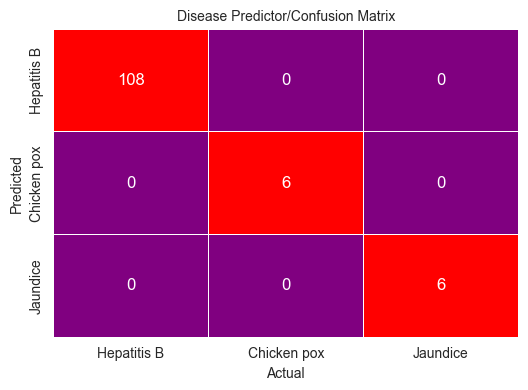

In [122]:
off_diag_mask = np.eye(*cm.shape, dtype=bool)
plt.figure(figsize=(6,4))
sns.heatmap(data=cm, annot=True, xticklabels=Symp_prediction, yticklabels=Symp_prediction, mask=~off_diag_mask ,cmap=['Red'],
                     cbar=False,fmt='g', linewidths=.6,)
sns.heatmap(data=cm, annot=True, xticklabels=Symp_prediction, yticklabels=Symp_prediction,mask=off_diag_mask, cmap=['Purple'],
                      cbar=False,fmt='g', linewidths=.6,)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Actual',fontsize=10)
plt.ylabel('Predicted',fontsize=10)
plt.title('Disease Predictor/Confusion Matrix',fontsize=10)
plt.show()


The code above is used to design or implement the confusion matrix based on the user input . The chart was created through the use of seaborn and matplotlib which were inpemented above

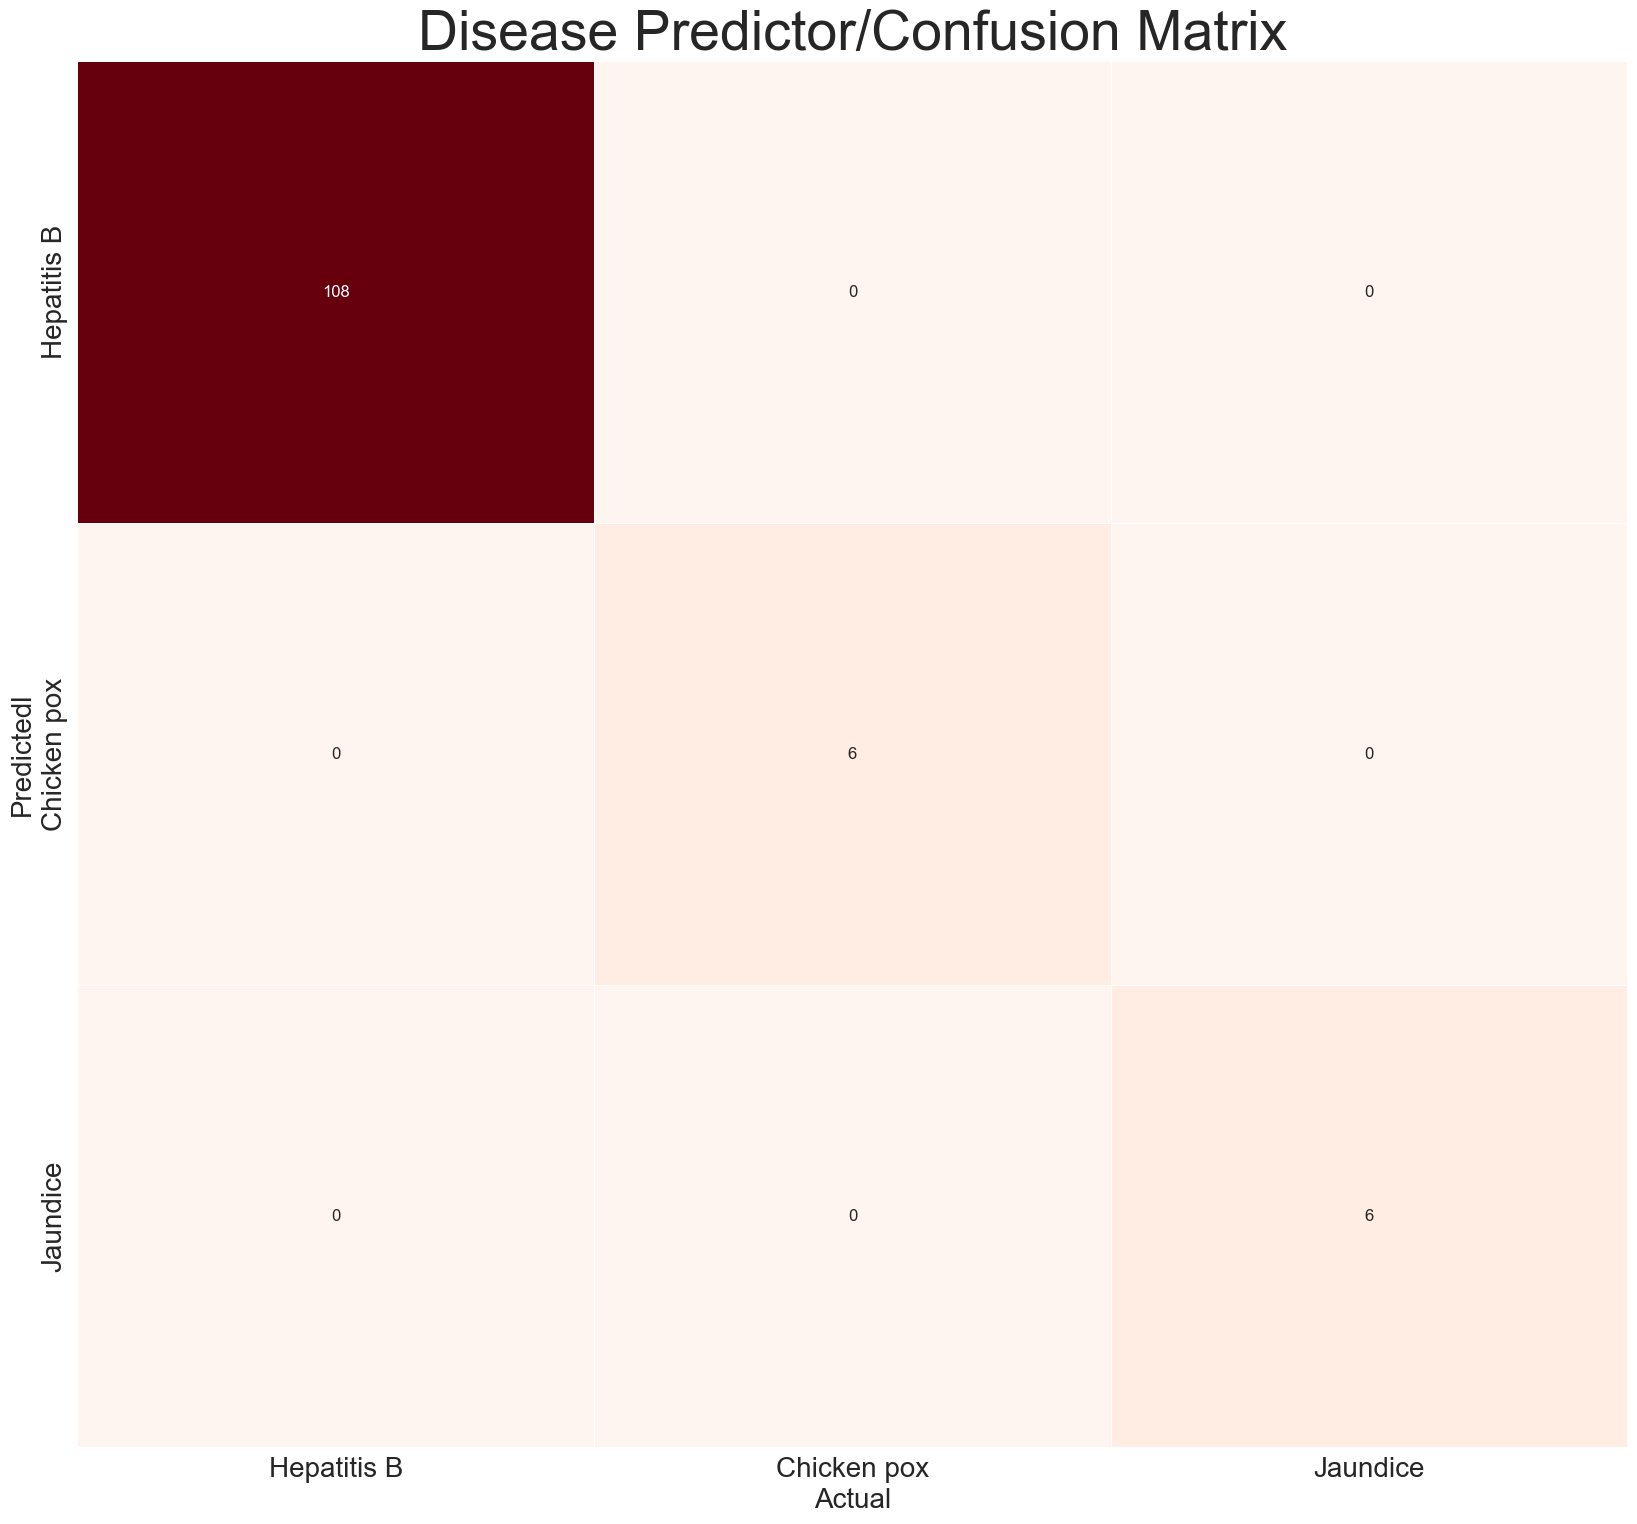

In [123]:
cf.sns_cm(npredict.Disease,npredict.prediction_label)


The chart / confusion matrix above was implemented through the use of a function and it displays the prediction of disease for the Pred sub dataset 